# Uncoupled dynamical systems

Here, we showcase how to generate data for the uncoupled SCM case, meaning uncoupled single dynamical systems. The ODE systems are integrated using the `dysts` package. 

Let's start by solving a single Lorenz system for 1000 time-steps. An uncoupled dynamical system is the equivalent to the solution for just one node, i.e., we set `num_nodes=1` .

In [18]:
from causaldynamics.systems import solve_system

data = solve_system(num_timesteps=1000, num_nodes=1, system_name='Lorenz')
data.shape # [num_timesteps, num_nodes, node_dim]

torch.Size([1000, 1, 3])

Let's visualize the result using the xarray package.

(<Axes3D: title={'center': 'Node 0'}, xlabel='X', ylabel='Y', zlabel='Z'>,)

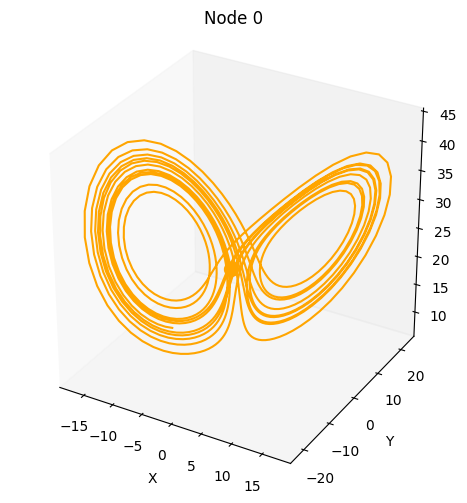

In [19]:
import xarray as xr

from causaldynamics.plot import plot_3d_trajectories

da = xr.DataArray(data, dims=['time', 'node', 'dim'])
plot_3d_trajectories(da)

We can also solve a randomly selected dynamical system.

(<Axes3D: title={'center': 'Node 0'}, xlabel='X', ylabel='Y', zlabel='Z'>,)

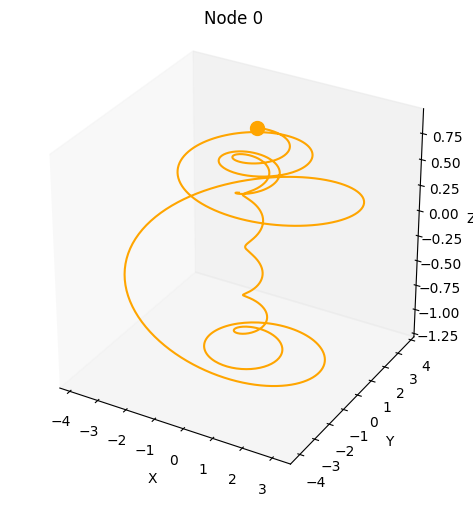

In [27]:
from causaldynamics.systems import solve_random_systems

data = solve_random_systems(num_timesteps=1000, num_nodes=1)
da = xr.DataArray(data, dims=['time', 'node', 'dim'])
plot_3d_trajectories(da)

We can also provide kwargs to the underlying `dysts.make_trajectory` function, e.g. add noise.

(<Axes3D: title={'center': 'Node 0'}, xlabel='X', ylabel='Y', zlabel='Z'>,)

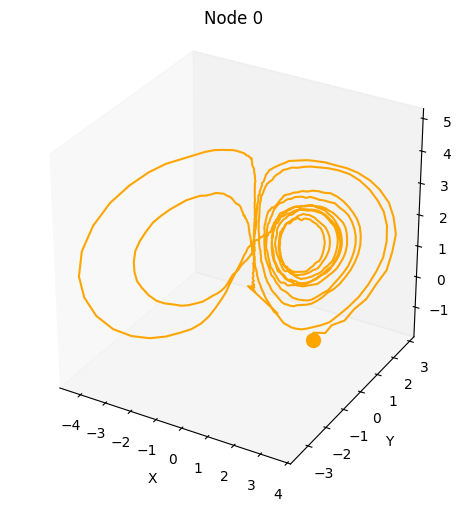

In [30]:
from causaldynamics.systems import solve_random_systems

data = solve_random_systems(num_timesteps=1000, num_nodes=1, make_trajectory_kwargs={'noise': 0.5})
da = xr.DataArray(data, dims=['time', 'node', 'dim'])
plot_3d_trajectories(da)

Also, by increasing `num_nodes` we can compute multiple uncoupled dynamical system trajectories in parallel using the same command.

/Users/herdeanu/kausable/causaldynamics/.venv/lib/python3.10/site-packages/dysts/base.py:353: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn(
/Users/herdeanu/kausable/causaldynamics/.venv/lib/python3.10/site-packages/dysts/base.py:353: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn(


(<Axes3D: title={'center': 'Node 0'}, xlabel='X', ylabel='Y', zlabel='Z'>,
 <Axes3D: title={'center': 'Node 1'}, xlabel='X', ylabel='Y', zlabel='Z'>,
 <Axes3D: title={'center': 'Node 2'}, xlabel='X', ylabel='Y', zlabel='Z'>,
 <Axes3D: title={'center': 'Node 3'}, xlabel='X', ylabel='Y', zlabel='Z'>,
 <Axes3D: title={'center': 'Node 4'}, xlabel='X', ylabel='Y', zlabel='Z'>)

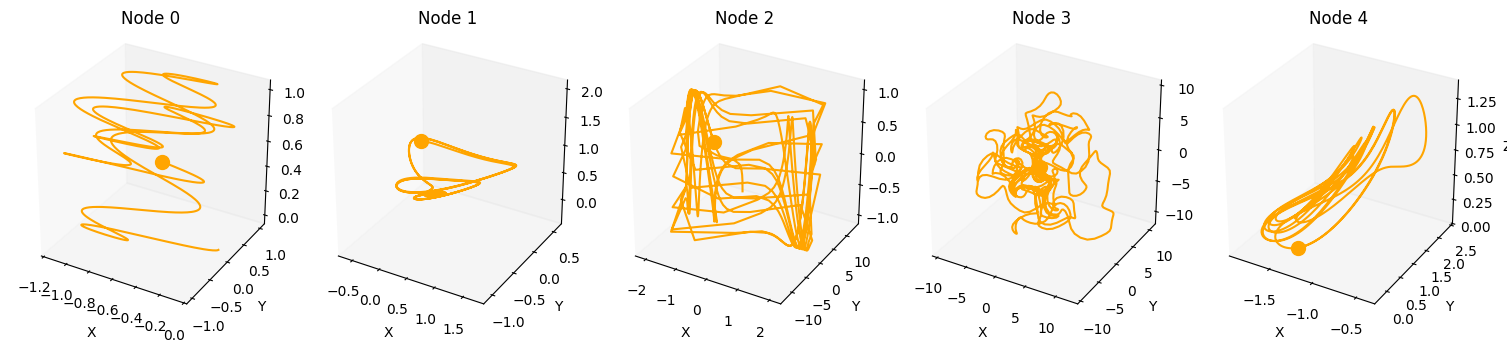

In [31]:
from causaldynamics.systems import solve_random_systems

data = solve_random_systems(num_timesteps=1000, num_nodes=5)
da = xr.DataArray(data, dims=['time', 'node', 'dim'])
plot_3d_trajectories(da)